<a href="https://colab.research.google.com/github/wiss0212/Video_streaming_churn/blob/main/Project_video_streaming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/wiss0212/Video_streaming_churn.git


Cloning into 'Video_streaming_churn'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 2), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (12/12), 420.87 KiB | 3.09 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [60]:
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression



In [34]:
path_train="/content/drive/MyDrive/data_coursera/Files/Files/home/jovyan/work/train.csv"
train_df=pd.read_csv(path_train)
train_df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


# New Section

In [35]:
path_test="/content/drive/MyDrive/data_coursera/Files/Files/home/jovyan/work/test.csv"
test_df=pd.read_csv(path_test)
test_df.head()


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


In [36]:
nan_values = train_df.isna().sum()
print("NaN values count per column:")
print(nan_values)

NaN values count per column:
AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64


In [37]:
# Check for negative values in the DataFrame
numeric_columns = train_df.select_dtypes(include=['number'])
negative_values_mask = numeric_columns< 0
negative_values_count = negative_values_mask.sum()
print("Columns with negative values and their counts:")
print(negative_values_count[negative_values_count > 0])

Columns with negative values and their counts:
Series([], dtype: int64)


In [38]:
mean_age = train_df['AccountAge'].mean()
print(mean_age)
empty_values = train_df.isnull().any()
print(empty_values)


60.083757542444836
AccountAge                  False
MonthlyCharges              False
TotalCharges                False
SubscriptionType            False
PaymentMethod               False
PaperlessBilling            False
ContentType                 False
MultiDeviceAccess           False
DeviceRegistered            False
ViewingHoursPerWeek         False
AverageViewingDuration      False
ContentDownloadsPerMonth    False
GenrePreference             False
UserRating                  False
SupportTicketsPerMonth      False
Gender                      False
WatchlistSize               False
ParentalControl             False
SubtitlesEnabled            False
CustomerID                  False
Churn                       False
dtype: bool


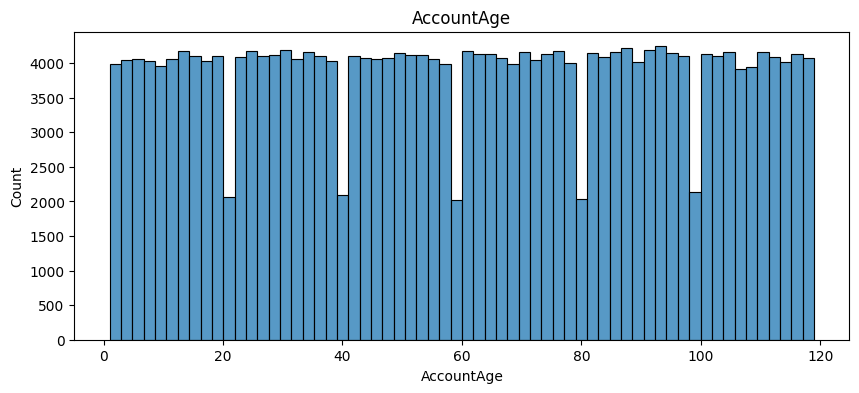

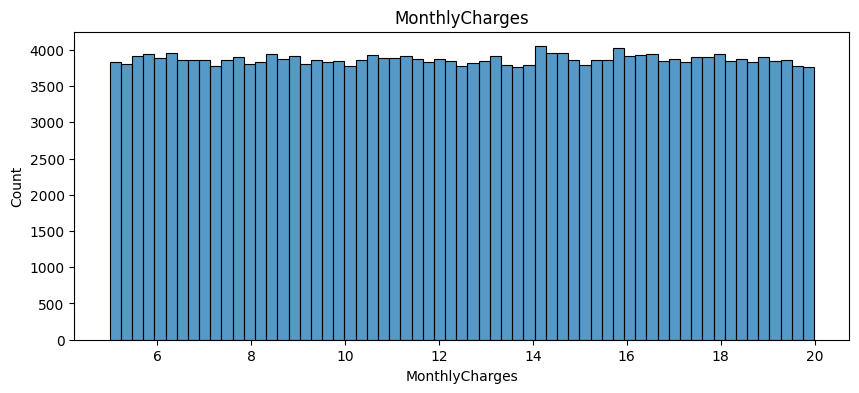

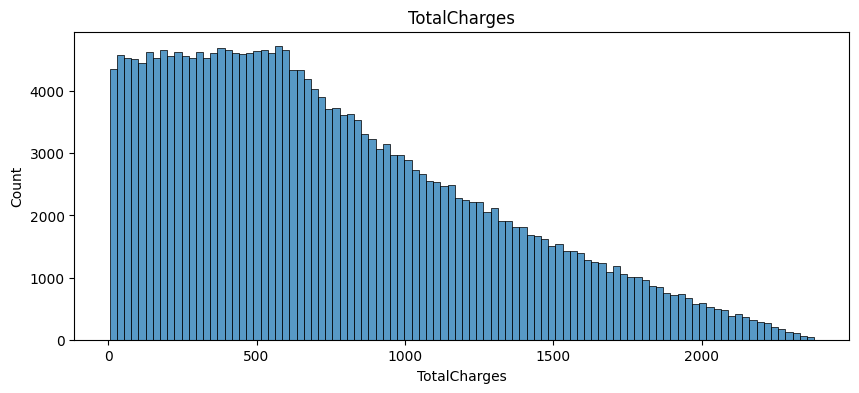

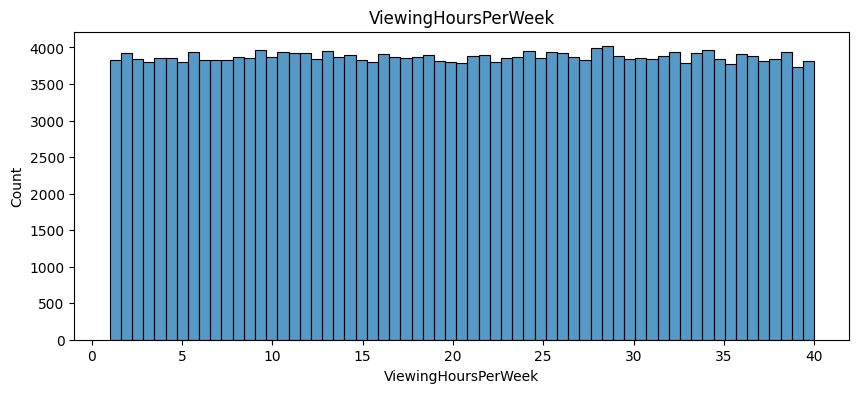

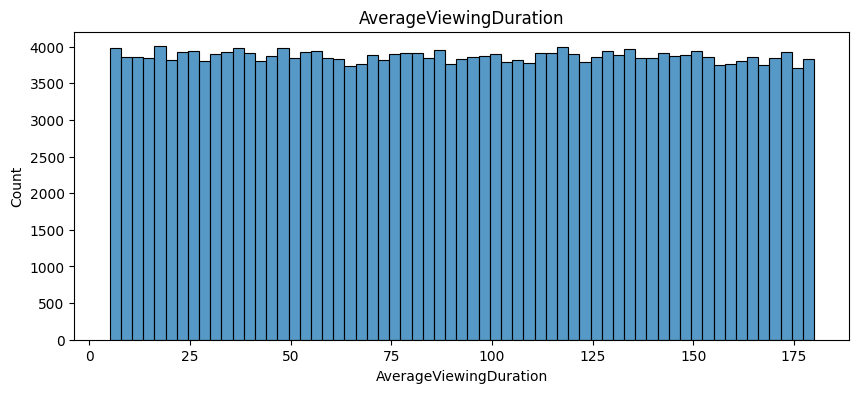

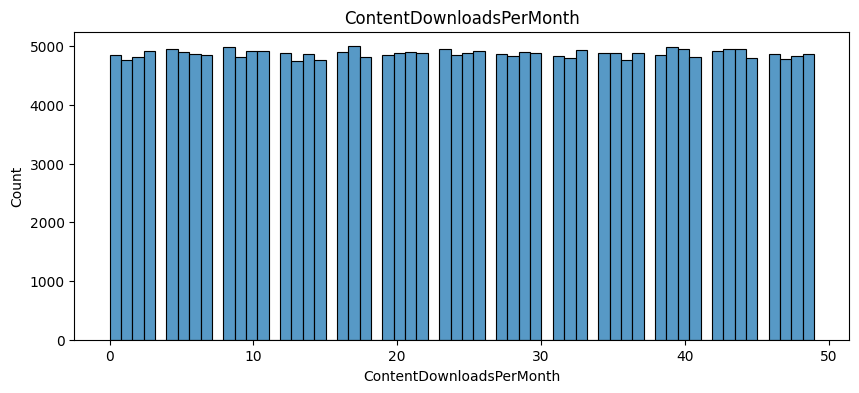

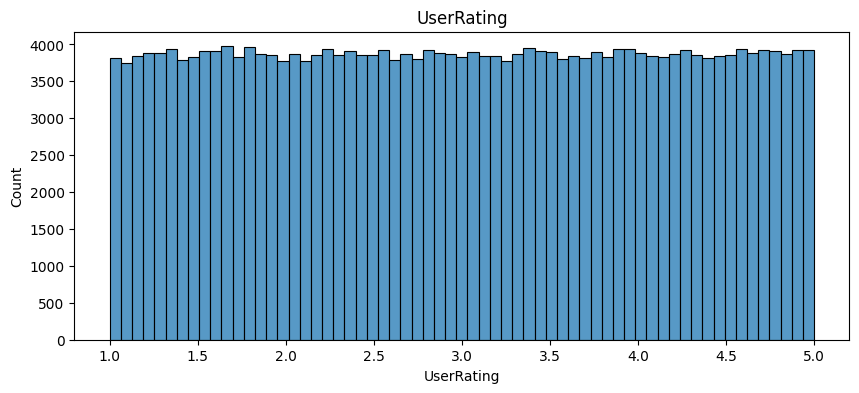

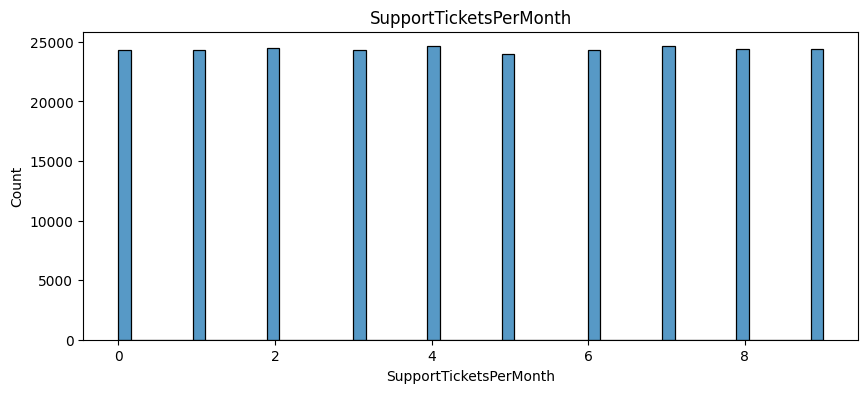

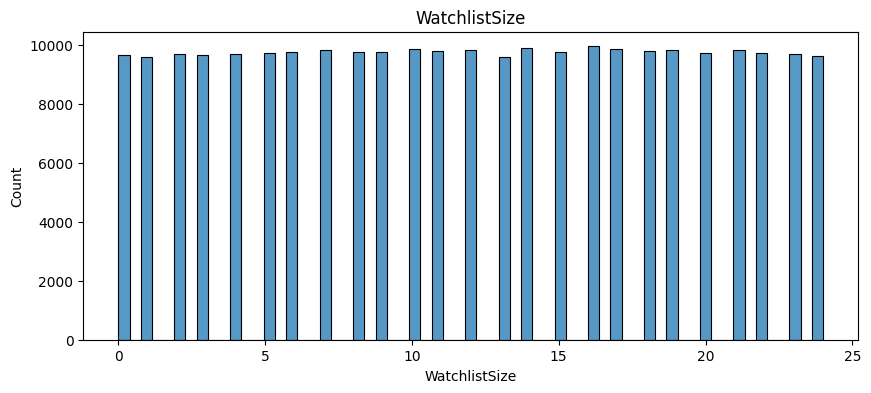

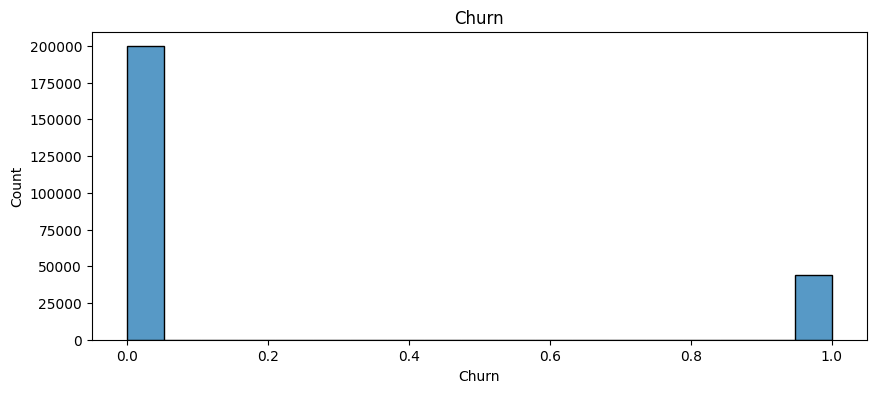

In [39]:
for column in train_df.columns:
    if train_df[column].dtype in ['float64', 'int64']:
        plt.figure(figsize=(10, 4))
        sns.histplot(train_df[column], kde=False)
        plt.title(column)
        plt.show()


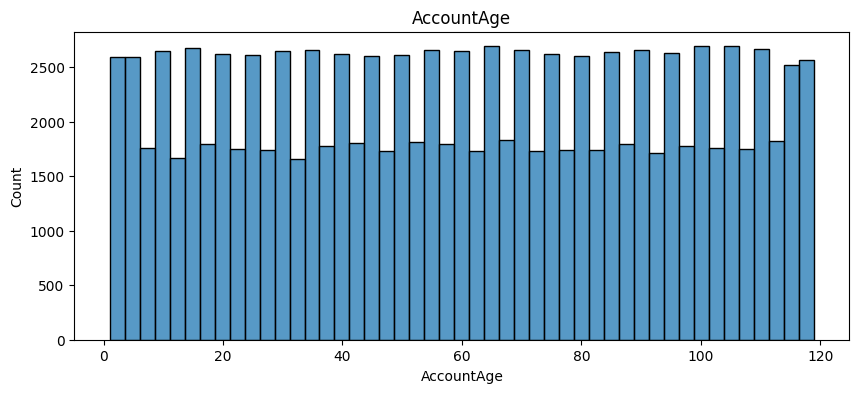

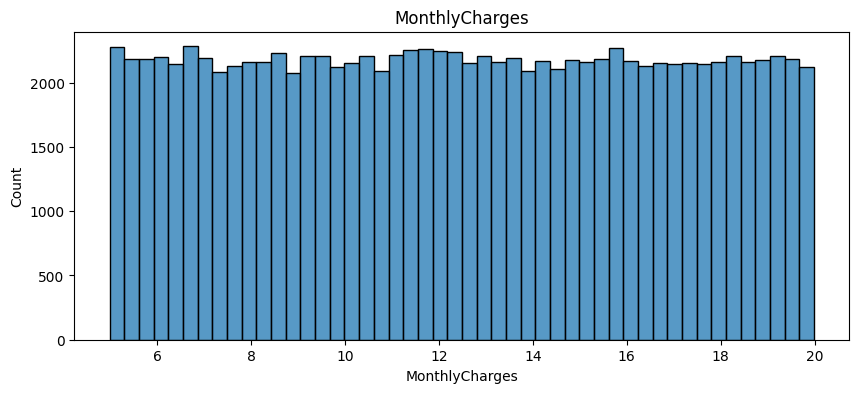

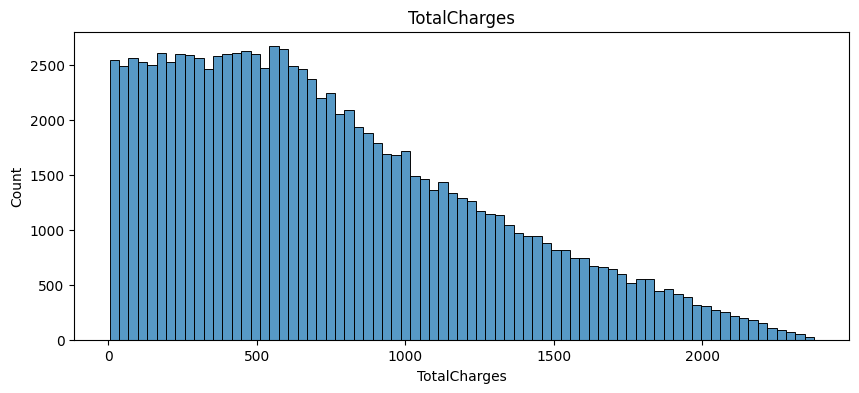

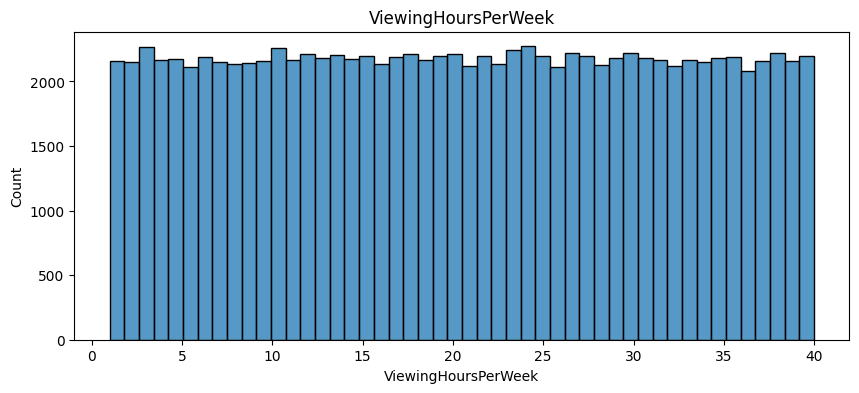

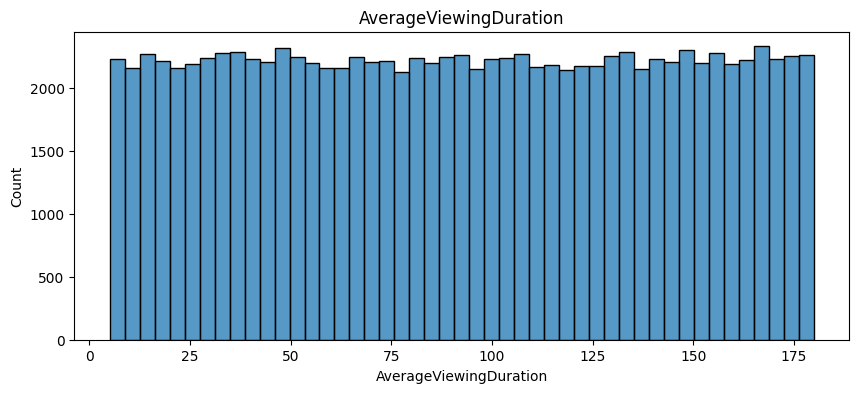

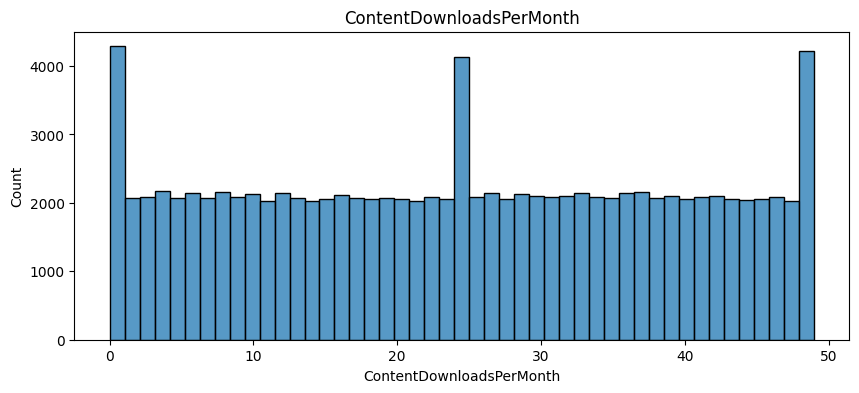

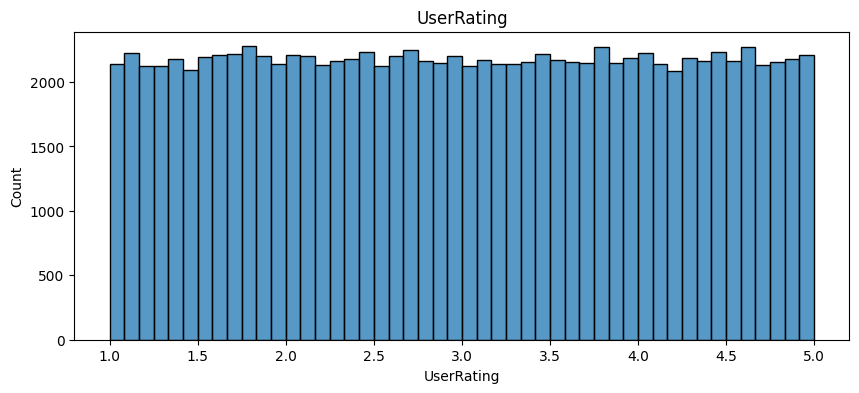

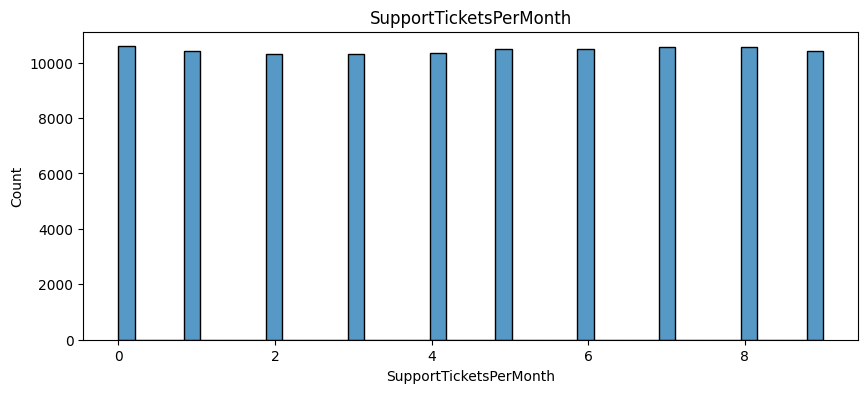

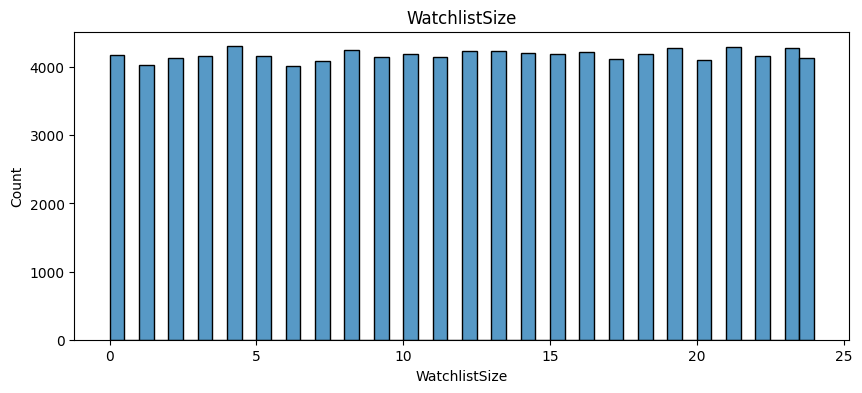

In [40]:
for column in test_df.columns:
    if test_df[column].dtype in ['float64', 'int64']:
        plt.figure(figsize=(10, 4))
        sns.histplot(test_df[column], kde=False)
        plt.title(column)
        plt.show()

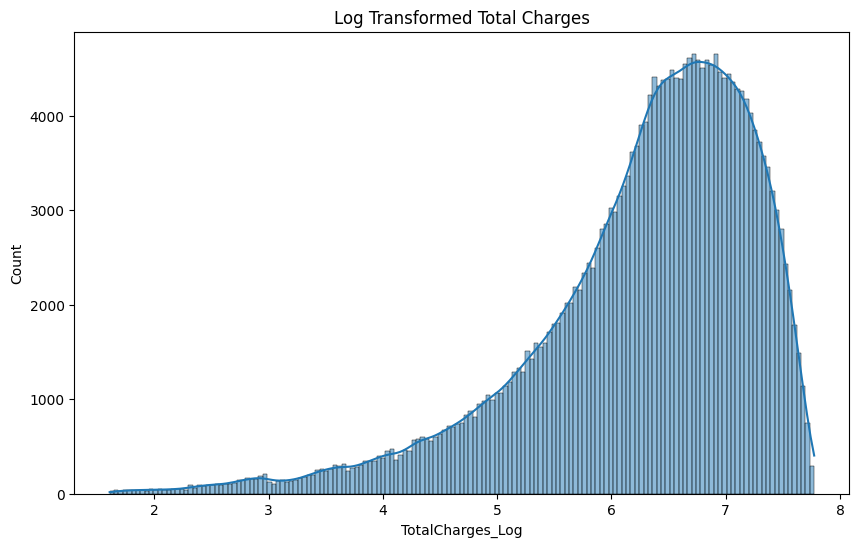

In [41]:
# Replace zeros with a small positive value if 'TotalCharges' contains zeros, since log(0) is undefined
train_df['TotalCharges'] = train_df['TotalCharges'].replace(0, np.finfo(float).eps)

# Apply the log transformation
train_df['TotalCharges_Log'] = np.log(train_df['TotalCharges'])

#plot
plt.figure(figsize=(10, 6))
sns.histplot(train_df['TotalCharges_Log'], kde=True)
plt.title('Log Transformed Total Charges')
plt.xlabel('TotalCharges_Log')
plt.ylabel('Count')
plt.show()

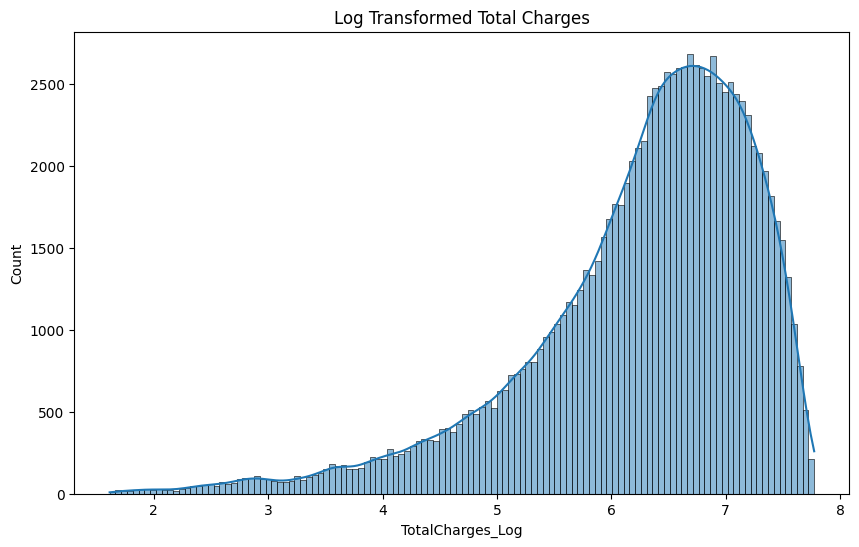

In [42]:
# Replace zeros with a small positive value if 'TotalCharges' contains zeros, since log(0) is undefined
test_df['TotalCharges'] = test_df['TotalCharges'].replace(0, np.finfo(float).eps)

# Apply the log transformation
test_df['TotalCharges_Log'] = np.log(test_df['TotalCharges'])

#plot
plt.figure(figsize=(10, 6))
sns.histplot(test_df['TotalCharges_Log'], kde=True)
plt.title('Log Transformed Total Charges')
plt.xlabel('TotalCharges_Log')
plt.ylabel('Count')
plt.show()

### **Scaling Features**

`MonthlyCharges` and other continuous features like `AccountAge`, `ViewingHoursPerWeek`, `AverageViewingDuration`, and the newly created `TotalCharges_Log` should be scaled. Scaling ensures that all features contribute equally to the model prediction and improves the convergence during training.


In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_to_scale = ['AccountAge', 'MonthlyCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'TotalCharges_Log']
train_df[features_to_scale] = scaler.fit_transform(train_df[features_to_scale])


In [45]:
test_df[features_to_scale] = scaler.fit_transform(test_df[features_to_scale])

### **Dealing with categorical Data (Encoding)**

In [46]:
train_df=train_df.drop(('CustomerID'), axis=1)
# Encode the 'Category' column
train_columns_category=train_df.select_dtypes(include=['object', 'category']).columns
train_columns_category

Index(['SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType',
       'MultiDeviceAccess', 'DeviceRegistered', 'GenrePreference', 'Gender',
       'ParentalControl', 'SubtitlesEnabled'],
      dtype='object')

In [47]:
train_df_encoded = pd.get_dummies(train_df, columns=train_columns_category, drop_first=True)


In [48]:
test_df_encoded = pd.get_dummies(test_df, columns=train_columns_category, drop_first=True)


###**Addressing Class Imbalance**
The 'Churn' variable displays a pronounced imbalance, with 81.88% of entries marked as 0 (no churn) and only 18.12% as 1 (churn), highlighting the need for intervention to prevent model bias towards the more frequent class. Techniques such as SMOTE (Synthetic Minority Over-sampling Technique) or Random Under Sampling are recommended to achieve a more balanced dataset. Employing these methods will ensure that the model treats both classes equitably and enhances accuracy, particularly in predicting the minority class. Additionally, using evaluation metrics suited for imbalanced data can further refine model performance during training.

In [49]:
# Calculate the percentage of 'Churn' values
churn_percentage = train_df['Churn'].value_counts(normalize=True) * 100

# Round the percentages to two decimal places
churn_percentage = churn_percentage.round(2)

churn_percentage

Churn
0    81.88
1    18.12
Name: proportion, dtype: float64

In [50]:
from imblearn.over_sampling import SMOTE

X = train_df_encoded.drop('Churn', axis=1)  # Features
y = train_df_encoded['Churn']  # Target

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the feature set and the target
X_resampled, y_resampled = smote.fit_resample(X, y)

# X_resampled and y_resampled are now the resampled dataset with a balanced target variable

In [51]:
X_resampled.columns

Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek',
       'AverageViewingDuration', 'ContentDownloadsPerMonth', 'UserRating',
       'SupportTicketsPerMonth', 'WatchlistSize', 'TotalCharges_Log',
       'SubscriptionType_Premium', 'SubscriptionType_Standard',
       'PaymentMethod_Credit card', 'PaymentMethod_Electronic check',
       'PaymentMethod_Mailed check', 'PaperlessBilling_Yes',
       'ContentType_Movies', 'ContentType_TV Shows', 'MultiDeviceAccess_Yes',
       'DeviceRegistered_Mobile', 'DeviceRegistered_TV',
       'DeviceRegistered_Tablet', 'GenrePreference_Comedy',
       'GenrePreference_Drama', 'GenrePreference_Fantasy',
       'GenrePreference_Sci-Fi', 'Gender_Male', 'ParentalControl_Yes',
       'SubtitlesEnabled_Yes'],
      dtype='object')

### **Training**

In [52]:
x_train, x_val, y_train, y_val = train_test_split(X_resampled,y_resampled , test_size=0.2, random_state=42)

In [53]:
logistic_reg = LogisticRegression(solver='saga', max_iter=500)
# Créez un dictionnaire des valeurs d'hyperparamètres à tester
param_grid = {'C': [ 0.1, 1], 'penalty': ['l1']}
# Créez une instance de GridSearchCV
grid = GridSearchCV(logistic_reg, param_grid, cv=10, scoring='roc_auc')

# Ajustez le GridSearchCV
grid.fit(x_train, y_train)

# Trouvez les meilleurs hyperparamètres
print(grid.best_params_)

# Utilisez le meilleur modèle pour prédire
best_model = grid.best_estimator_
y_pred = best_model.predict_proba(x_val)[:, 1]
roc_auc = roc_auc_score(y_val, y_pred)
print(f'Tested ROC AUC: {roc_auc}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

{'C': 1, 'penalty': 'l1'}
Tested ROC AUC: 0.8853813500615184


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [58]:
test_df_encoded = test_df_encoded.drop('CustomerID', axis=1)
y_pred_test = best_model.predict_proba(test_df_encoded)[:, 1]
df_int_y_pred_test = y_pred_test.round().astype(int)
y_pred_test_df=pd.DataFrame(df_int_y_pred_test)
y_pred_test_df

,0
0,0
1,0
2,0
3,0
4,1
...,...
104475,0
104476,0
104477,0
104478,0


In [61]:
# Predicting the test set results
y_pred = best_model.predict(x_val)

# Evaluate best_model
print("Classification Report:\n", classification_report(y_val, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81     40050
           1       0.80      0.81      0.81     39792

    accuracy                           0.81     79842
   macro avg       0.81      0.81      0.81     79842
weighted avg       0.81      0.81      0.81     79842

Confusion Matrix:
 [[32166  7884]
 [ 7583 32209]]


In [62]:
id_test=test_df['CustomerID']
id_test


0         O1W6BHP6RM
1         LFR4X92X8H
2         QM5GBIYODA
3         D9RXTK2K9F
4         ENTCCHR1LR
             ...    
104475    UTKREC613O
104476    MDB4E477PS
104477    IPDIA02ZE1
104478    ITLFTPRJGV
104479    Y204GZY6NE
Name: CustomerID, Length: 104480, dtype: object

In [63]:
y_pred_test_1d = np.squeeze(y_pred_test_df)  # Squeeze 1D from the 2D array

# Create a DataFrame
prediction_df = pd.DataFrame({
    'CustomerID': id_test,
    'predicted_probability': y_pred_test_1d
})




In [64]:
# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(prediction_df.shape)
prediction_df.head(10)

(104480, 2)


,CustomerID,predicted_probability
0,O1W6BHP6RM,0
1,LFR4X92X8H,0
2,QM5GBIYODA,0
3,D9RXTK2K9F,0
4,ENTCCHR1LR,1
5,7A88BB5IO6,1
6,70OMW9XEWR,0
7,EL1RMFMPYL,0
8,4IA2QPT6ZK,0
9,AEDCWHSJDN,1


### **Final Prediction**

In [65]:
# Save DataFrame to CSV
prediction_df.to_csv('Predictions.csv', index=False)  # index=False ensures the index (row numbers) isn't written to the file



In [66]:
from google.colab import files

files.download('Predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>